In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import us
from plotly.subplots import make_subplots
from itertools import combinations
from matplotlib_venn import venn2 ,venn3, venn3_unweighted

In [2]:
import Visualization_Functions as VisPy
from Visualization_Functions import SankeyData_Plotly, VennData

In [3]:
code_str = VisPy.SankeyPlotly_Example()
exec(code_str)

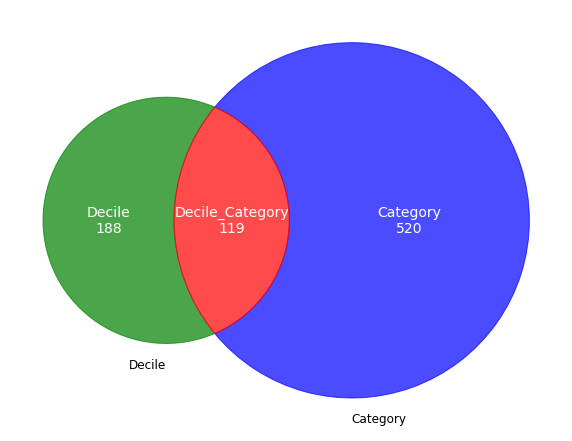

In [4]:
code_str = VisPy.Venn2D_Example()
exec(code_str)

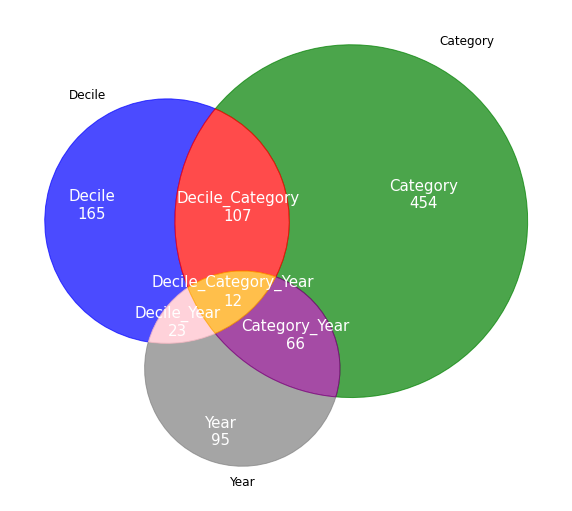

In [5]:
code_str = VisPy.Venn3D_Example()
exec(code_str)

In [6]:
code_str = VisPy.ChoroPleth_USA_PlotlyPX()
exec(code_str)

In [7]:
code_str = VisPy.ChoroPleth_USA_PlotlyGO()
exec(code_str)